Temporal Difference (TD) learning
Chapter 2, TensorFlow 2 Reinforcement Learning Cookbook | Praveen Palanisamy

In [1]:
import numpy as np
from envs.gridworldv2 import GridworldV2Env
from value_function_utils import visualize_grid_state_values

In [2]:
def temporal_difference_learning(env, max_episodes):
    grid_state_values = np.zeros((len(env.distinct_states), 1))
    grid_state_values[env.goal_state] = 1
    grid_state_values[env.bomb_state] = -1
    # v: state-value function
    v = grid_state_values
    gamma = 0.99  # Discount factor
    alpha = 0.01  # learning rate

    for episode in range(max_episodes):
        state = env.reset()
        done = False
        while not done:
            action = env.action_space.sample()  # random policy
            next_state, reward, done = env.step(action)

            # State-value function updates using TD(0)
            v[state] += alpha * (reward + gamma * v[next_state] - v[state])
            state = next_state
    visualize_grid_state_values(grid_state_values.reshape((3, 4)))

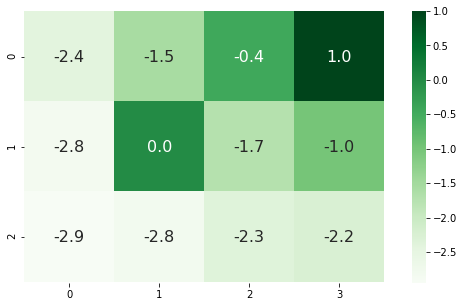

In [3]:
if __name__ == "__main__":
    max_episodes = 4000
    env = GridworldV2Env(step_cost=-0.1, max_ep_length=30)
    temporal_difference_learning(env, max_episodes)